# 4 Page View Time Series Visualizer

## 4.1 Problem Description

<p>For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.</p>

<p>Use the data to complete the following tasks:</p>

<ul>
<li>Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.</li>
<li>Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.</li>
<li>Create a <code>draw_line_plot</code> function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".</li>
<li>Create a <code>draw_bar_plot</code> function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".</li>
<li>Create a <code>draw_box_plot</code> function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.</li>
</ul>

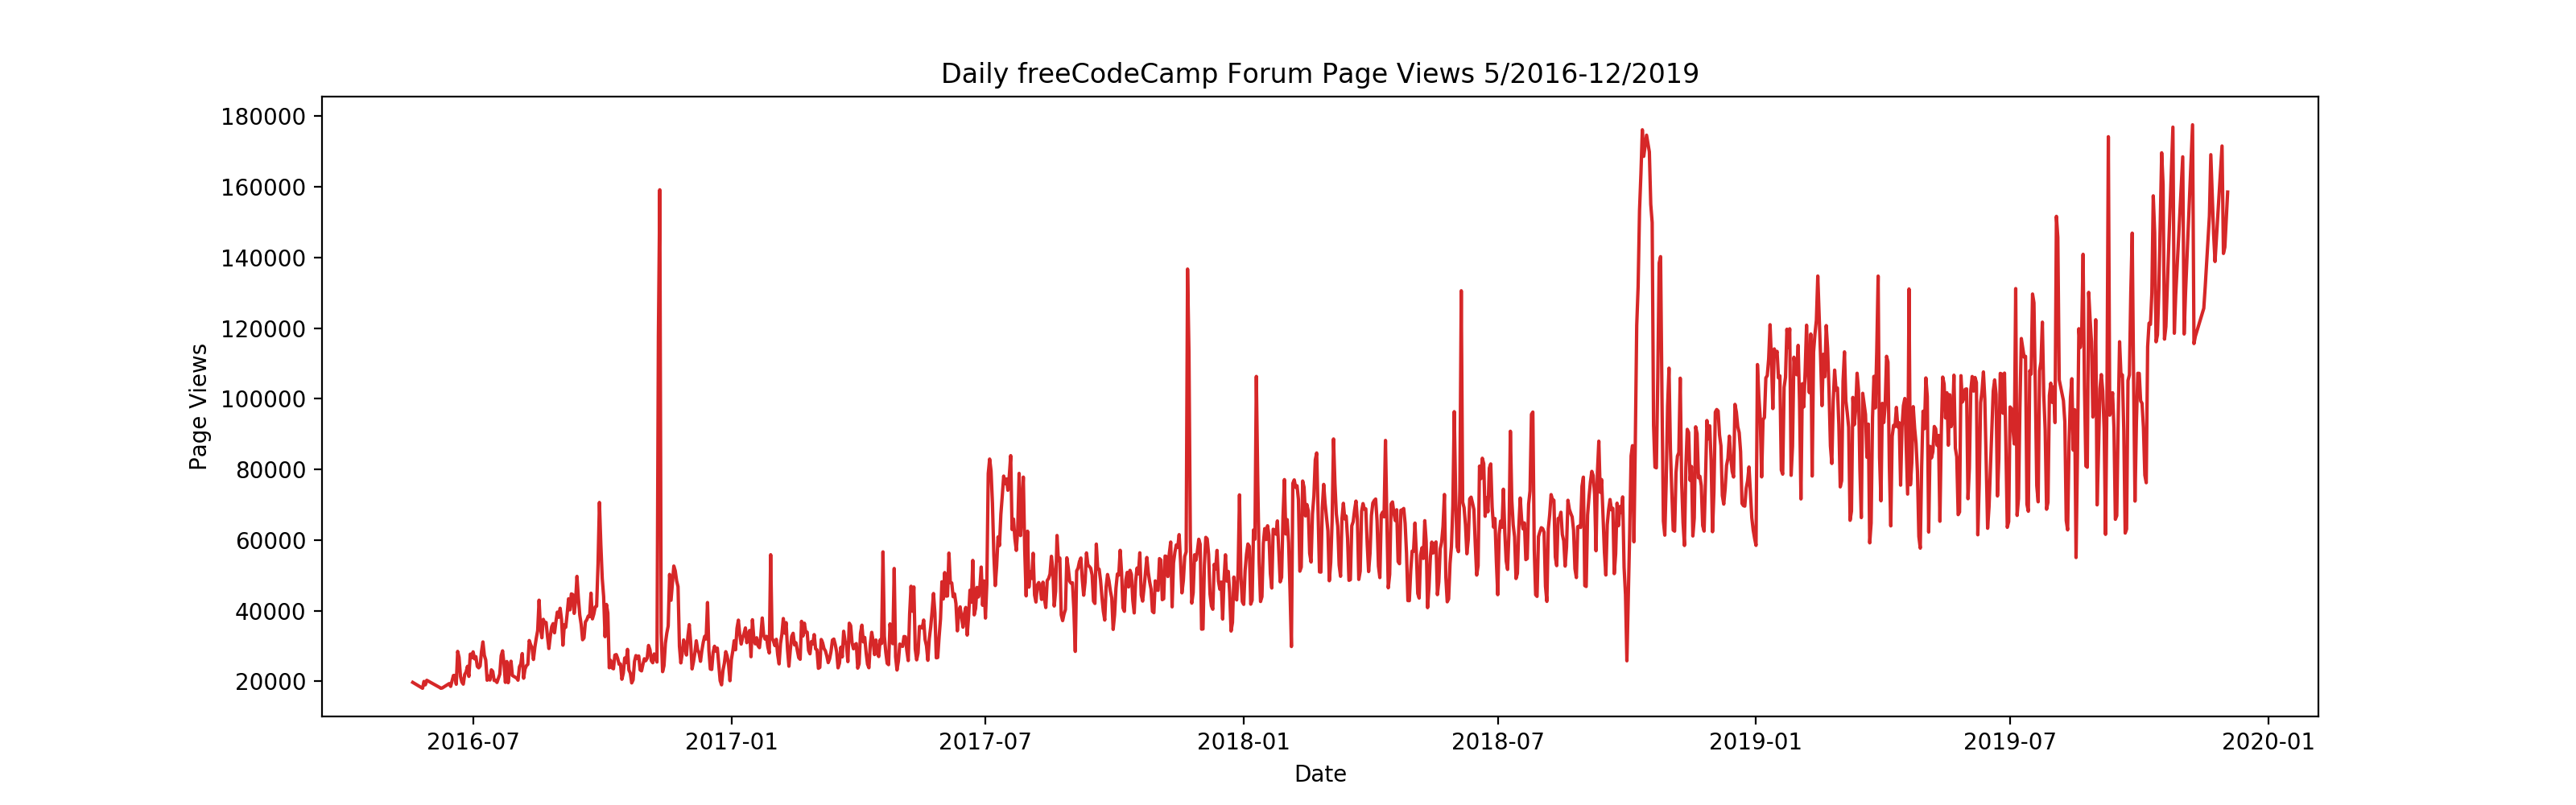

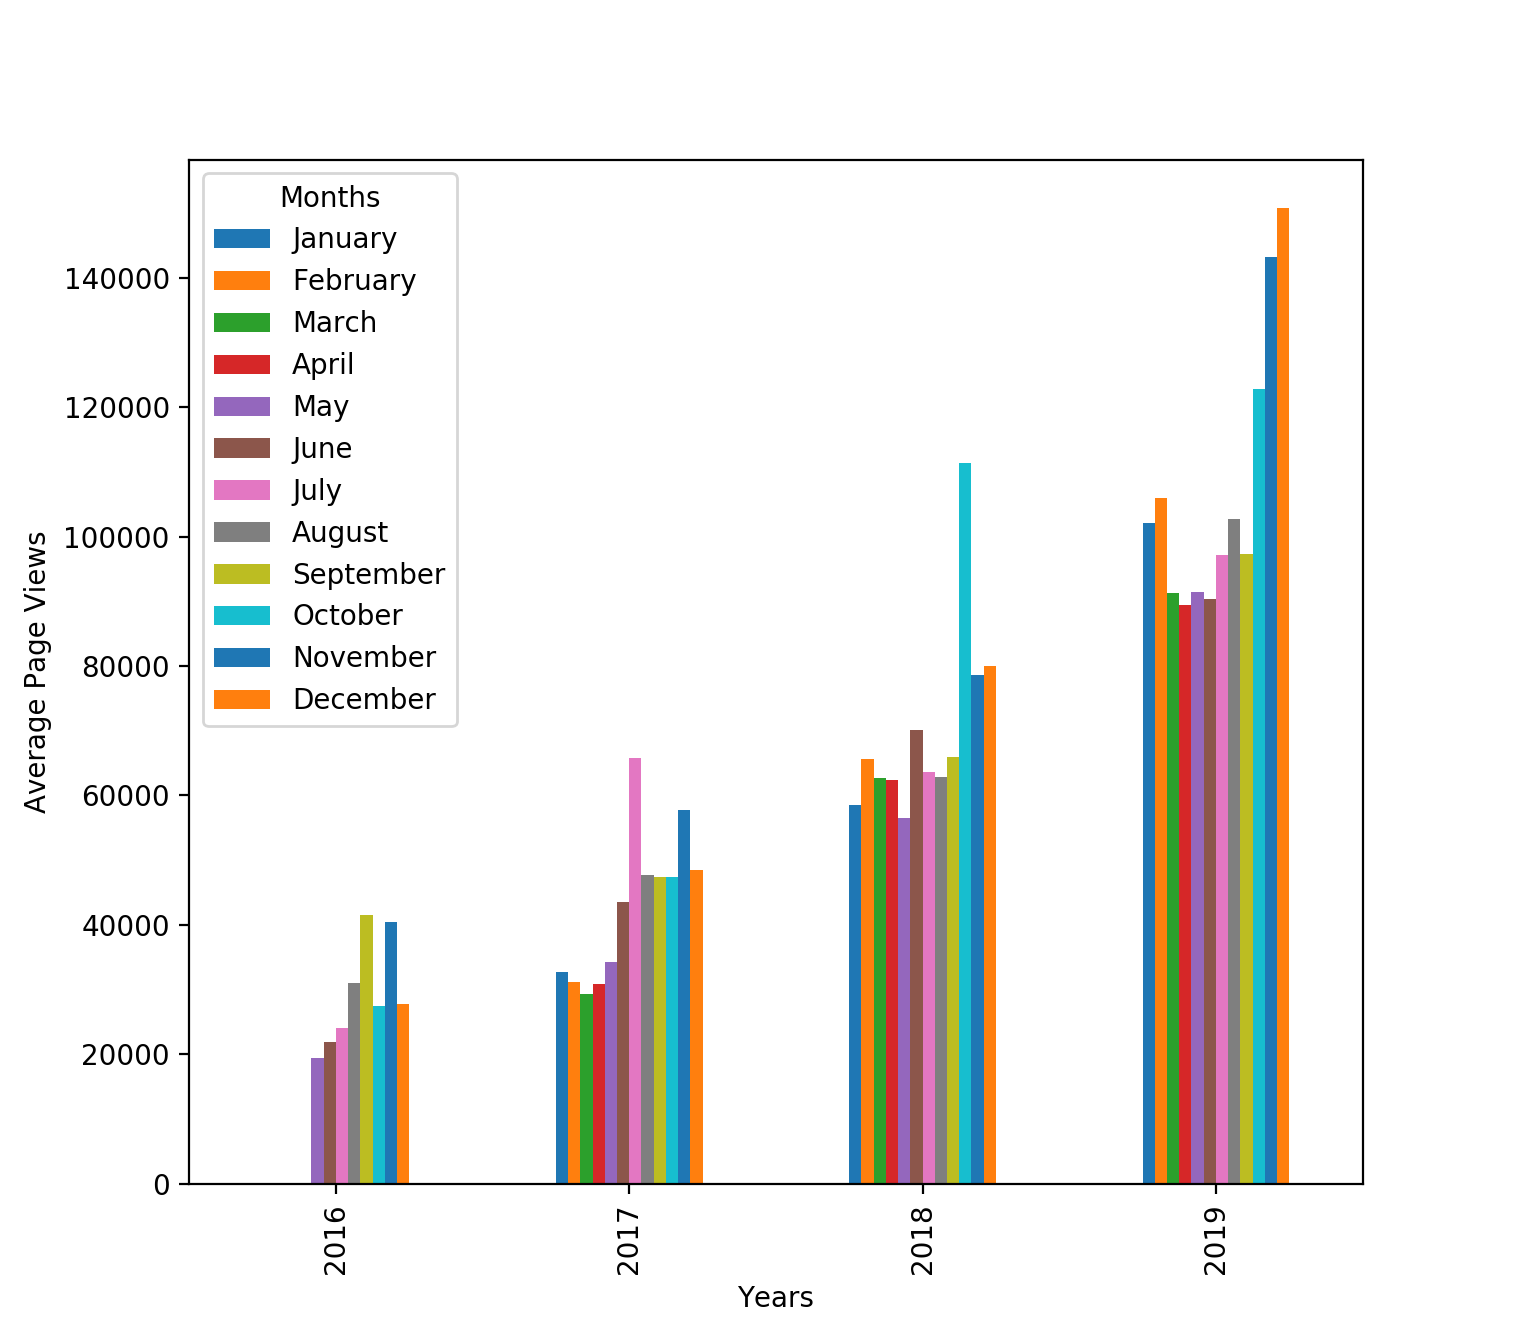

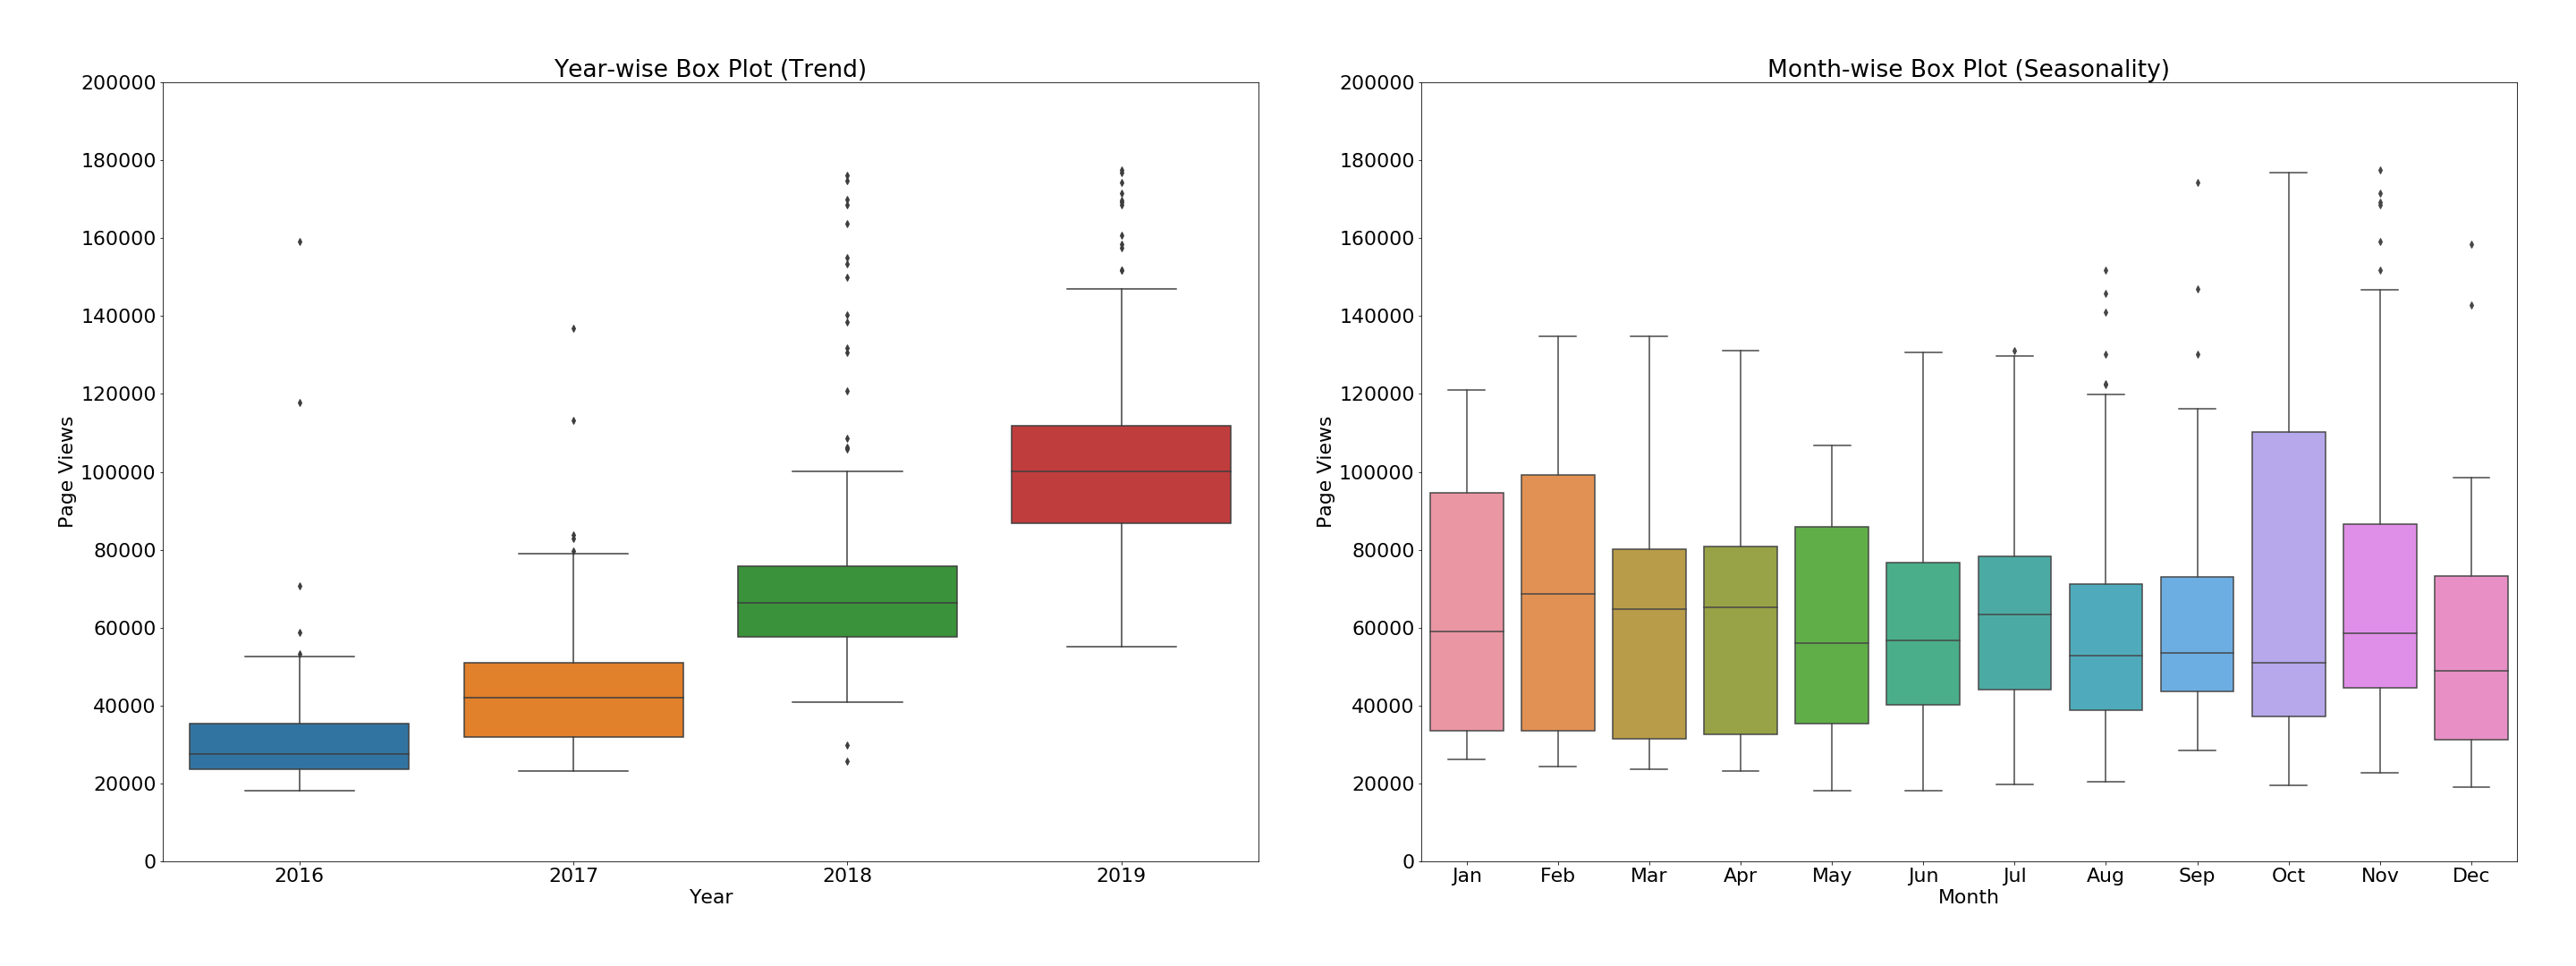

<p>For each chart, make sure to use a copy of the data frame. Unit tests are written for you under <code>test_module.py</code>.</p>

<p>The boilerplate also includes commands to save and return the image.</p>

## 4.2 Problem Solution

In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters

In [183]:
register_matplotlib_converters()

In [184]:
months= ['January',
         'February',
         'March',
         'April',
         'May',
         'June',
         'July',
         'August',
         'September',
         'October',
         'November',
         'December',
]

### 4.2.1 Importing Data

In [185]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date" , parse_dates=True)

### 4.2.2 Cleaning Data

In [186]:
df = df[ df["value"].between( df["value"].quantile(.025), df["value"].quantile(.975) ) ]

### 4.2.3 Draw Line Plot

In [187]:
def draw_line_plot():

    fig, ax = plt.subplots(figsize=(15, 5))
    
    ax = sns.lineplot(data = df, legend="brief")
    ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set(xlabel = "Date",ylabel = "Page Views")
    
    #fig.savefig('line_plot.png')
    return fig

### 4.2.4 Draw Bar Plot

In [188]:
def draw_bar_plot():
    
    df_bar = df.copy()
    df_bar["year"] = df.index.year.values
    df_bar["month"] = df.index.month_name()

    fig, ax = plt.subplots(figsize=(15,5))
    
    ax = sns.barplot(x="year", hue="month", y="value", data=df_bar, hue_order = months, ci=None)
    ax.set(xlabel = "Years",ylabel = "Average Page Views")

    #fig.savefig('bar_plot.png')
    return fig

### 4.2.5 Draw Box Plots

In [189]:
def draw_box_plot():

    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    df_box['monthnumber'] = df.index.month
    df_box = df_box.sort_values('monthnumber')
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    sns.boxplot(y = "value", x = "year", data = df_box, ax = ax[0] ) 
    ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(y = "value", x = "month", data = df_box, ax = ax[1])
    ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")
    
    y_ticks = [
        "0",
        "20000",
        "40000",
        "60000",
        "80000",
        "100000",
        "120000",
        "140000",
        "160000",
        "180000",
        "200000",
    ]
    ax[0].yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
    ax[0].set_yticklabels(y_ticks)

    #fig.savefig('box_plot.png')
    return fig

## 4.3 Testing

In [190]:
import unittest
import matplotlib as mpl

In [191]:
class DataCleaningTestCase(unittest.TestCase):
    def test_data_cleaning(self):
        actual = int(df.count(numeric_only=True))
        expected = 1238
        self.assertEqual(
            actual,
            expected,
            "Expected DataFrame count after cleaning to be 1238.",
        )

In [192]:
class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_line_plot()
        self.ax = self.fig.axes[0]

    def test_line_plot_title(self):
        actual = self.ax.get_title()
        expected = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
        self.assertEqual(
            actual,
            expected,
            "Expected line plot title to be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'",
        )

    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Date"
        self.assertEqual(
            actual, expected, "Expected line plot xlabel to be 'Date'"
        )
        actual = self.ax.get_ylabel()
        expected = "Page Views"
        self.assertEqual(
            actual, expected, "Expected line plot ylabel to be 'Page Views'"
        )

    def test_line_plot_data_quatity(self):
        actual = len(self.ax.lines[0].get_ydata())
        expected = 1238
        self.assertEqual(
            actual,
            expected,
            "Expected number of data points in line plot to be 1238.",
        )

In [193]:
class BarPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_bar_plot()
        self.ax = self.fig.axes[0]

    def test_bar_plot_legend_labels(self):
        actual = []
        for label in self.ax.get_legend().get_texts():
            actual.append(label.get_text())
        expected = [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected bar plot legend labels to be months of the year.",
        )

    def test_bar_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Years"
        self.assertEqual(
            actual, expected, "Expected bar plot xlabel to be 'Years'"
        )
        actual = self.ax.get_ylabel()
        expected = "Average Page Views"
        self.assertEqual(
            actual,
            expected,
            "Expected bar plot ylabel to be 'Average Page Views'",
        )
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ["2016", "2017", "2018", "2019"]
        self.assertEqual(
            actual,
            expected,
            "Expected bar plot secondary labels to be '2016', '2017', '2018', '2019'",
        )

    def test_bar_plot_number_of_bars(self):
        actual = len(
            [
                rect
                for rect in self.ax.get_children()
                if isinstance(rect, mpl.patches.Rectangle)
            ]
        )
        expected = 49
        self.assertEqual(
            actual,
            expected,
            "Expected a different number of bars in bar chart.",
        )

In [194]:
class BoxPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_box_plot()
        self.ax1 = self.fig.axes[0]
        self.ax2 = self.fig.axes[1]

    def test_box_plot_number(self):
        actual = len(self.fig.get_axes())
        expected = 2
        self.assertEqual(actual, expected, "Expected two box plots in figure.")

    def test_box_plot_labels(self):
        actual = self.ax1.get_xlabel()
        expected = "Year"
        self.assertEqual(
            actual, expected, "Expected box plot 1 xlabel to be 'Year'"
        )
        actual = self.ax1.get_ylabel()
        expected = "Page Views"
        self.assertEqual(
            actual, expected, "Expected box plot 1 ylabel to be 'Page Views'"
        )
        actual = self.ax2.get_xlabel()
        expected = "Month"
        self.assertEqual(
            actual, expected, "Expected box plot 2 xlabel to be 'Month'"
        )
        actual = self.ax2.get_ylabel()
        expected = "Page Views"
        self.assertEqual(
            actual, expected, "Expected box plot 2 ylabel to be 'Page Views'"
        )
        actual = []
        for label in self.ax1.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ["2016", "2017", "2018", "2019"]
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 1 secondary labels to be '2016', '2017', '2018', '2019'",
        )
        actual = []
        for label in self.ax2.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = [
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 2 secondary labels to be 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'",
        )
        actual = []

        for label in self.ax1.get_yaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = [
            "0",
            "20000",
            "40000",
            "60000",
            "80000",
            "100000",
            "120000",
            "140000",
            "160000",
            "180000",
            "200000",
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 1 secondary labels to be '0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000'",
        )

    def test_box_plot_titles(self):
        actual = self.ax1.get_title()
        expected = "Year-wise Box Plot (Trend)"
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 1 title to be 'Year-wise Box Plot (Trend)'",
        )
        actual = self.ax2.get_title()
        expected = "Month-wise Box Plot (Seasonality)"
        self.assertEqual(
            actual,
            expected,
            "Expected box plot 2 title to be 'Month-wise Box Plot (Seasonality)'",
        )

    def test_box_plot_number_of_boxs(self):
        actual = len(self.ax1.lines) / 6  # Every box has 6 lines
        expected = 4
        self.assertEqual(actual, expected, "Expected four boxes in box plot 1")
        actual = len(self.ax2.lines) / 6  # Every box has 6 lines
        expected = 12
        self.assertEqual(actual, expected, "Expected 12 boxes in box plot 2")

...........
----------------------------------------------------------------------
Ran 11 tests in 1.376s

OK


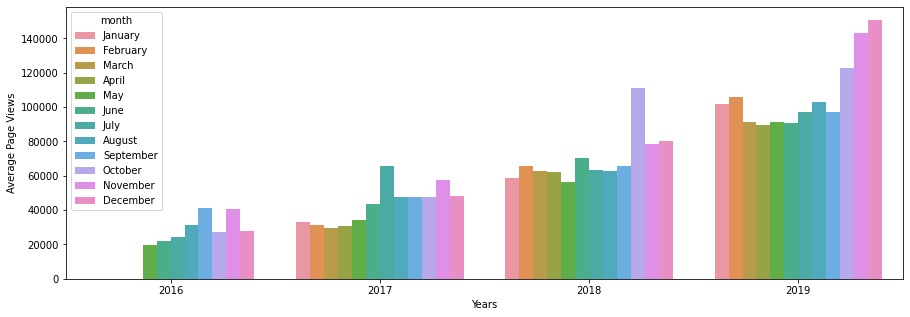

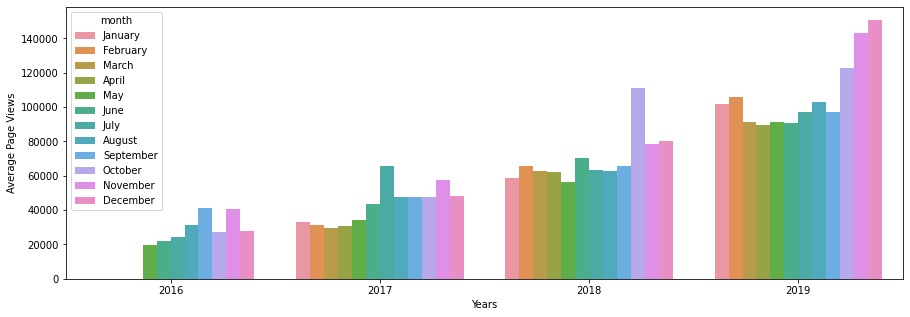

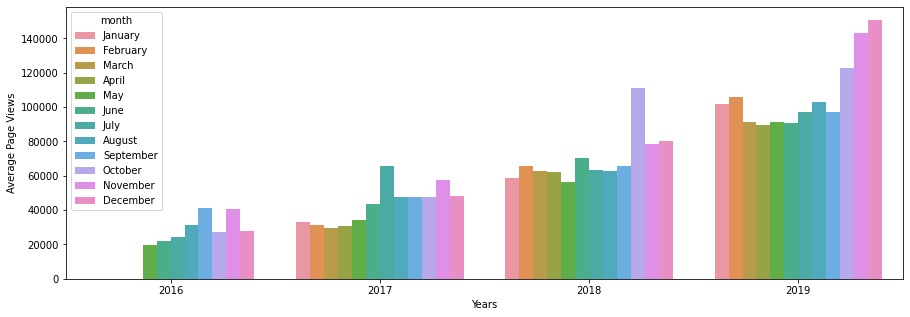

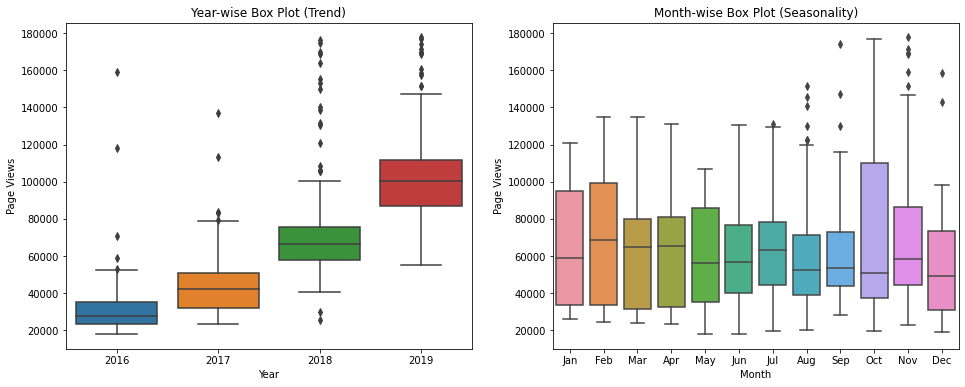

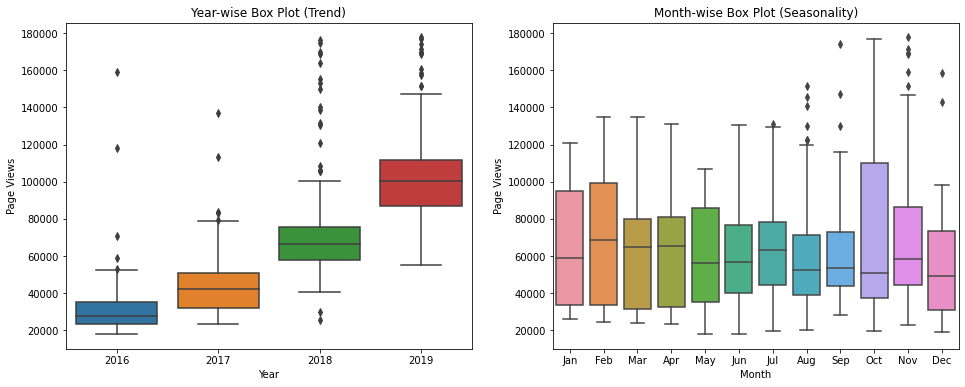

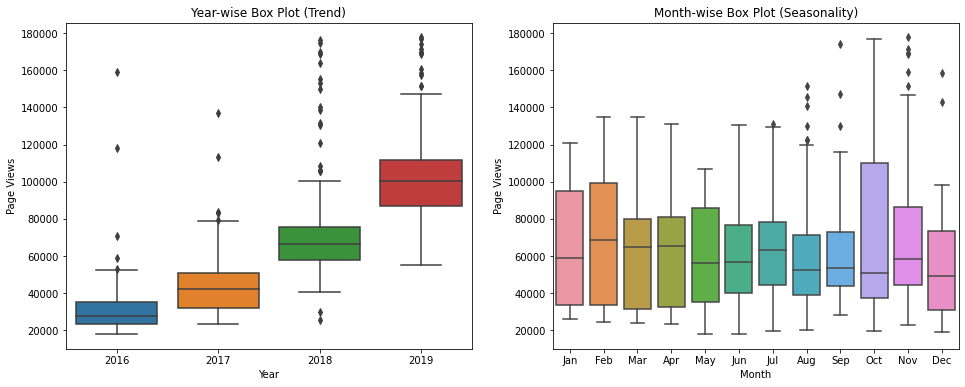

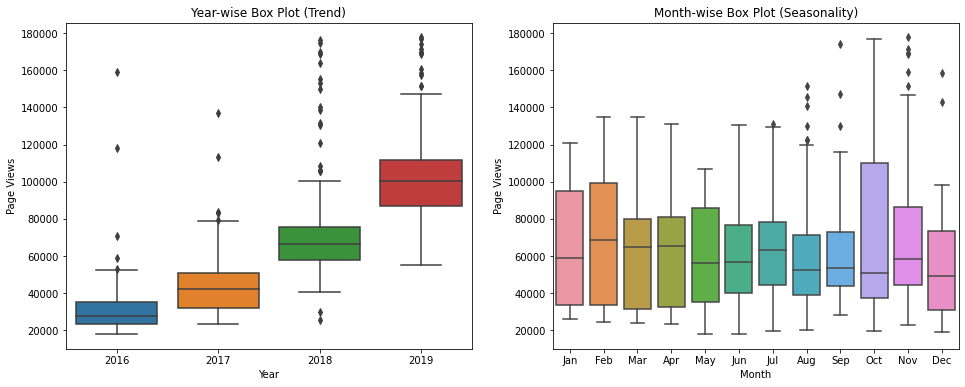

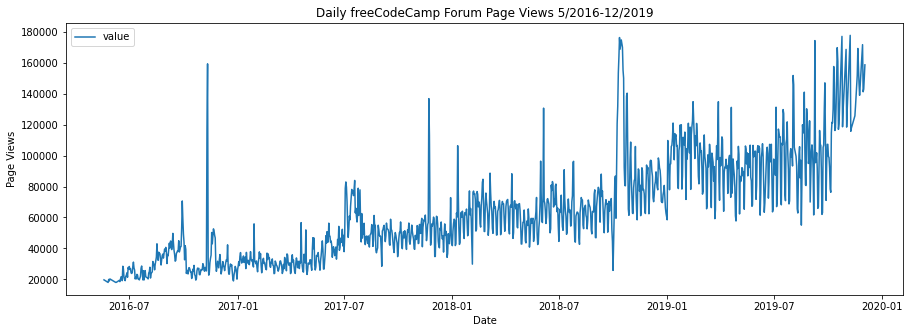

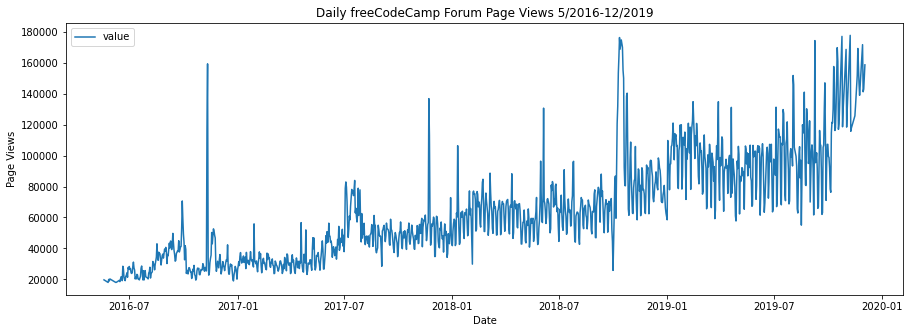

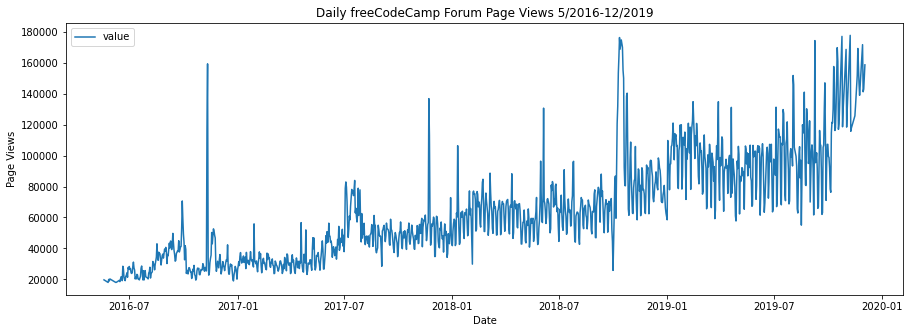

In [195]:
if __name__ == "__main__":
    unittest.main(
        argv=["first-arg-is-ignored"],
        exit=False,
    )